#### Imports 

In [159]:
# import libraries
import pandas as pd
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.tsa.stattools as sts 
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats.distributions import chi2
from datetime import timedelta
rcParams['figure.figsize'] = 12, 7
%matplotlib inline

#### Load the dataset

In [2]:
df = pd.read_csv('covid_19_data.csv')


#### Data Cleaning 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7926 entries, 0 to 7925
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              7926 non-null   int64  
 1   ObservationDate  7926 non-null   object 
 2   Province/State   4493 non-null   object 
 3   Country/Region   7926 non-null   object 
 4   Last Update      7926 non-null   object 
 5   Confirmed        7926 non-null   float64
 6   Deaths           7926 non-null   float64
 7   Recovered        7926 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 495.5+ KB


In [4]:
df.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     3433
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [5]:
df['Province/State'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan',
       'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang',
       nan, 'Chicago', 'Illinois', 'California', 'Arizona', 'Ontario',
       'New South Wales', 'Victoria', 'British Columbia', 'Bavaria',
       'Queensland', 'Chicago, IL', 'South Australia', 'Boston, MA',
       'Los Angeles, CA', 'Orange, CA', 'Santa Clara, CA', 'Seattle, WA',
       'Tempe, AZ', 'San Benito, CA', 'Toronto, ON', 'London, ON',
       'Madison, WI', 'Cruise Ship', 'Diamond Princess cruise ship',
       'San Diego County, CA', 'San Antonio, TX', 'Ashland, NE',
       'Travis, CA', 'From Diamond Princess', 'Lackland, TX', 'None',
       'Humboldt

In [6]:
df["ObservationDate"]=pd.to_datetime(df["ObservationDate"])

In [7]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
7921,7922,2020-03-22,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7922,7923,2020-03-22,NaN,Puerto Rico,2020-03-22T22:43:02,0.0,1.0,0.0
7923,7924,2020-03-22,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7924,7925,2020-03-22,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0


In [8]:
bydate=df.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
bydate.head()

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0


In [9]:
print("Basic Information")
print("Totol number of countries with Disease Spread: ",len(df["Country/Region"].unique()))
print("Total number of Confirmed Cases: ",bydate["Confirmed"].iloc[-1])
print("Total number of Recovered Cases: ",bydate["Recovered"].iloc[-1])
print("Total number of Deaths Cases: ",bydate["Deaths"].iloc[-1])
print("Total number of Active Cases around the World: ",(bydate["Confirmed"].iloc[-1]-bydate["Recovered"].iloc[-1]))

Basic Information
Totol number of countries with Disease Spread:  200
Total number of Confirmed Cases:  335957.0
Total number of Recovered Cases:  97882.0
Total number of Deaths Cases:  14634.0
Total number of Active Cases around the World:  238075.0


#### EDA

In [ ]:
df.Confirmed.plot()

In [ ]:
bydate

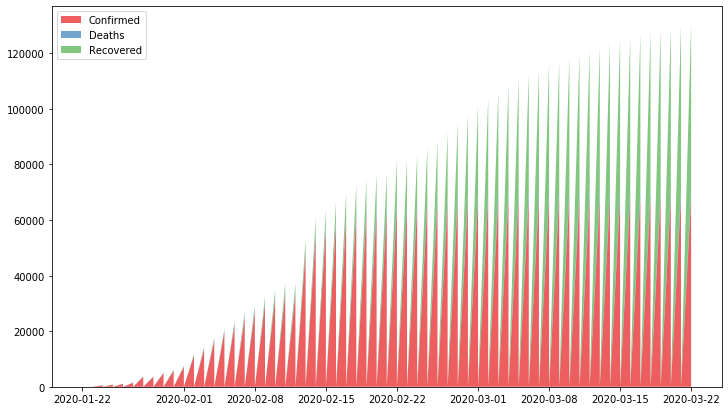

In [10]:
x= df["ObservationDate"].values
y=[df.Confirmed.values, df.Deaths.values, df.Recovered.values]
 
# Plot
pal = sns.color_palette("Set1")
plt.figure(figsize=[12.0, 7.0])
plt.stackplot(x,y, labels=['Confirmed','Deaths','Recovered'], colors=pal, alpha=0.7)
plt.legend(loc='upper left')
plt.show()

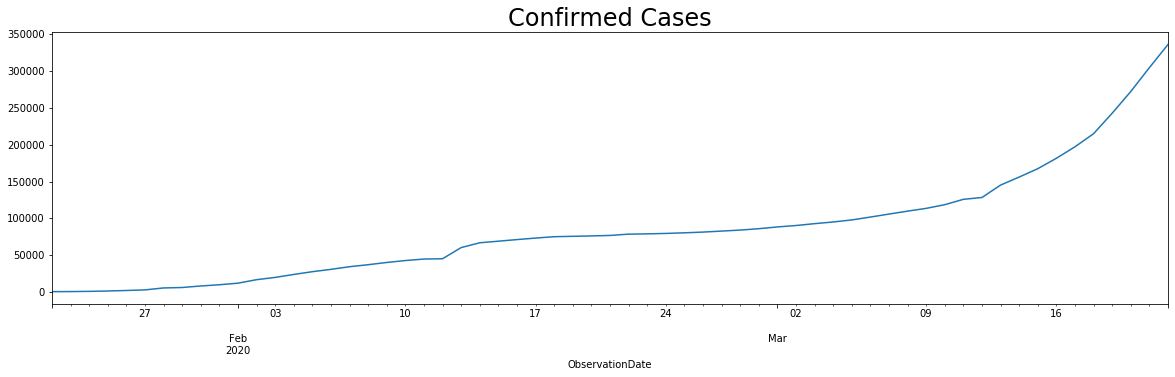

In [11]:
bydate.Confirmed.plot(figsize = (20,5))
plt.title("Confirmed Cases", size= 24)
plt.show()

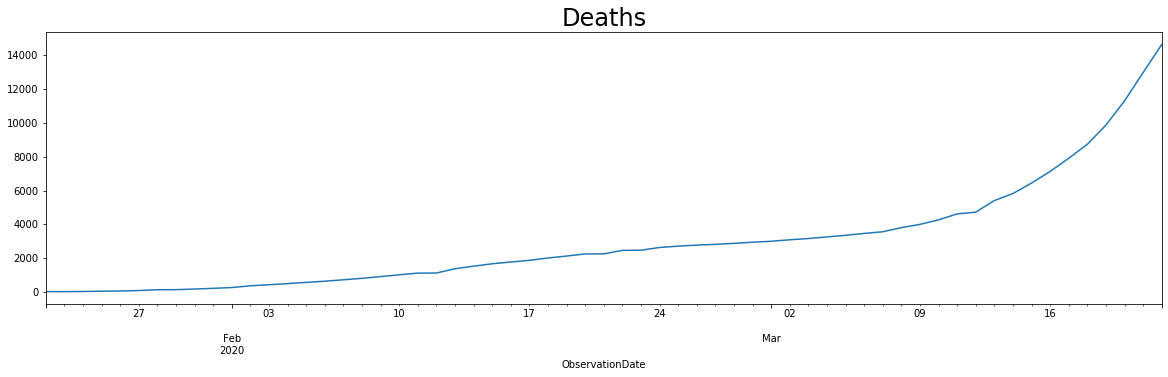

In [12]:
bydate.Deaths.plot(figsize = (20,5))
plt.title("Deaths", size= 24)
plt.show()

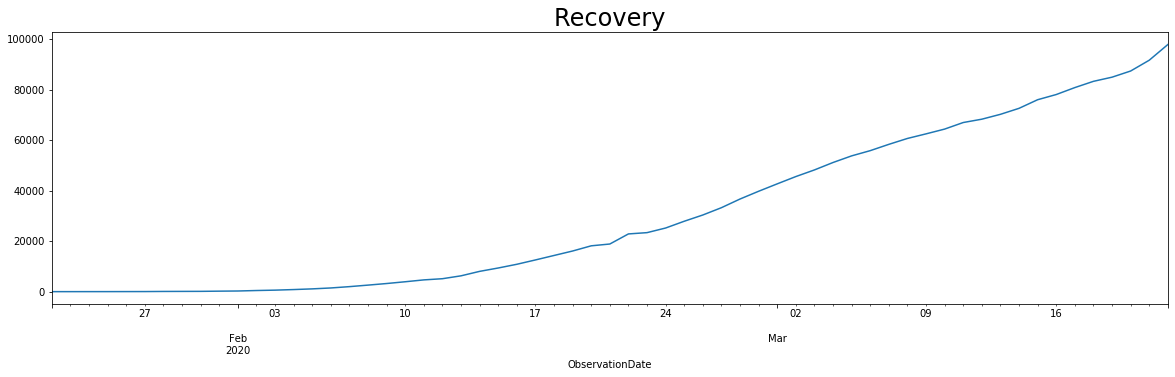

In [13]:
bydate.Recovered.plot(figsize = (20,5))
plt.title("Recovery", size= 24)
plt.show()

#### Models

##### Train_Test_split

In [14]:
bydate= bydate.asfreq('D') # resampling daily 

In [ ]:
bydate.head(55)

In [20]:
size = int(len(bydate)*0.8)

In [23]:
df_train, df_test = bydate.iloc[:size], bydate.iloc[size:]

In [27]:
df_train['nat_Confirmed'] = df_train.Confirmed.apply(lambda x: np.log(x))  


/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_train

,Confirmed,Recovered,Deaths,nat_Confirmed
ObservationDate,,,,
2020-01-22,555.0,28.0,17.0,6.318968
2020-01-23,653.0,30.0,18.0,6.481577
2020-01-24,941.0,36.0,26.0,6.846943
2020-01-25,1438.0,39.0,42.0,7.271009
2020-01-26,2118.0,52.0,56.0,7.658228
2020-01-27,2927.0,61.0,82.0,7.981733
2020-01-28,5578.0,107.0,131.0,8.626586
2020-01-29,6165.0,126.0,133.0,8.726643
2020-01-30,8235.0,143.0,171.0,9.016149


In [29]:
sts.adfuller(df_train.nat_Confirmed) # dickey-fuller test to check for staionarity 

(-9.416550023516224,
 5.649067772527874e-16,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 -118.64847437695377)

In [25]:
sts.adfuller(df_train.Deaths)

(3.1113277087454,
 1.0,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 406.45091771978224)

In [26]:
sts.adfuller(df_train.Recovered)

(-1.2199819215797936,
 0.6649414741450057,
 3,
 44,
 {'1%': -3.5885733964124715,
  '5%': -2.929885661157025,
  '10%': -2.6031845661157025},
 582.9641018011513)

##### AR(1)

In [30]:
model_ar = ARMA(df_train.nat_Confirmed, order=(1,0))

In [31]:
results_ar = model_ar.fit()

In [32]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          nat_Confirmed   No. Observations:                   48
Model:                     ARMA(1, 0)   Log Likelihood                  11.579
Method:                       css-mle   S.D. of innovations              0.180
Date:                Thu, 26 Mar 2020   AIC                            -17.158
Time:                        14:58:22   BIC                            -11.545
Sample:                    01-22-2020   HQIC                           -15.037
                         - 03-09-2020                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.0536      2.528      3.582      0.000       4.099      14.008
ar.L1.nat_Confirmed     0.9976      0.003    299.153      0.000       0.991       1.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0024           +0.0000j            1.0024            0.0000
-----------------------------------------------------------------------------
"""

In [33]:
model_ar_2 = ARMA(df_train.nat_Confirmed, order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          nat_Confirmed   No. Observations:                   48
Model:                     ARMA(2, 0)   Log Likelihood                  33.160
Method:                       css-mle   S.D. of innovations              0.113
Date:                Thu, 26 Mar 2020   AIC                            -58.320
Time:                        14:58:41   BIC                            -50.835
Sample:                    01-22-2020   HQIC                           -55.492
                         - 03-09-2020                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.2828      2.077      4.470      0.000       5.212      13.353
ar.L1.nat_Confirmed     1.7688      0.088     20.207      0.000       1.597       1.940
ar.L2.nat_Confirmed    -0.7734      0.089     -8.696      0.000      -0.948      -0.599
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0227           +0.0000j            1.0227            0.0000
AR.2            1.2642           +0.0000j            1.2642            0.0000
-----------------------------------------------------------------------------
"""

In [34]:
model_ar_3 = ARMA(df_train.nat_Confirmed, order=(3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          nat_Confirmed   No. Observations:                   48
Model:                     ARMA(3, 0)   Log Likelihood                  40.585
Method:                       css-mle   S.D. of innovations              0.095
Date:                Thu, 26 Mar 2020   AIC                            -71.170
Time:                        14:59:19   BIC                            -61.814
Sample:                    01-22-2020   HQIC                           -67.635
                         - 03-09-2020                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.2492      1.818      5.088      0.000       5.686      12.812
ar.L1.nat_Confirmed     1.3567      0.121     11.241      0.000       1.120       1.593
ar.L2.nat_Confirmed     0.1727      0.236      0.732      0.464      -0.290       0.635
ar.L3.nat_Confirmed    -0.5360      0.125     -4.287      0.000      -0.781      -0.291
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0328           -0.0583j            1.0345           -0.0090
AR.2            1.0328           +0.0583j            1.0345            0.0090
AR.3           -1.7435           -0.0000j            1.7435           -0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
model_ar_4 = ARMA(df_train.Confirmed, order=(4,0))
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

##### MA(1)

In [48]:
model_ma = ARMA(df_train.nat_Confirmed, order=(0,1))

In [49]:
results_ma = model_ma.fit()

In [50]:
results_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          nat_Confirmed   No. Observations:                   48
Model:                     ARMA(0, 1)   Log Likelihood                 -57.024
Method:                       css-mle   S.D. of innovations              0.762
Date:                Thu, 26 Mar 2020   AIC                            120.049
Time:                        15:13:43   BIC                            125.662
Sample:                    01-22-2020   HQIC                           122.170
                         - 03-09-2020                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.3111      0.218     47.335      0.000       9.884      10.738
ma.L1.nat_Confirmed     1.0000      0.054     18.510      0.000       0.894       1.106
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

In [51]:
model_ma2 = ARMA(df_train.nat_Confirmed, order=(0,2))
results_ma2 = model_ma2.fit()
results_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          nat_Confirmed   No. Observations:                   48
Model:                     ARMA(0, 2)   Log Likelihood                 -35.254
Method:                       css-mle   S.D. of innovations              0.466
Date:                Thu, 26 Mar 2020   AIC                             78.508
Time:                        15:14:49   BIC                             85.993
Sample:                    01-22-2020   HQIC                            81.337
                         - 03-09-2020                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.2650      0.240     42.690      0.000       9.794      10.736
ma.L1.nat_Confirmed     1.6464      0.111     14.845      0.000       1.429       1.864
ma.L2.nat_Confirmed     0.9999      0.115      8.664      0.000       0.774       1.226
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.8233           -0.5677j            1.0001           -0.4039
MA.2           -0.8233           +0.5677j            1.0001            0.4039
-----------------------------------------------------------------------------
"""

In [52]:
model_ma3 = ARMA(df_train.nat_Confirmed, order=(0,3))
results_ma3 = model_ma3.fit()
results_ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          nat_Confirmed   No. Observations:                   48
Model:                     ARMA(0, 3)   Log Likelihood                 -15.107
Method:                       css-mle   S.D. of innovations              0.302
Date:                Thu, 26 Mar 2020   AIC                             40.214
Time:                        15:14:50   BIC                             49.570
Sample:                    01-22-2020   HQIC                            43.750
                         - 03-09-2020                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.2723      0.248     41.475      0.000       9.787      10.758
ma.L1.nat_Confirmed     1.9624      0.109     18.019      0.000       1.749       2.176
ma.L2.nat_Confirmed     1.9607      0.156     12.588      0.000       1.655       2.266
ma.L3.nat_Confirmed     0.9389      0.096      9.750      0.000       0.750       1.128
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0649           -0.0000j            1.0649           -0.5000
MA.2           -0.5117           -0.8593j            1.0001           -0.3355
MA.3           -0.5117           +0.8593j            1.0001            0.3355
-----------------------------------------------------------------------------
"""

In [54]:
model_ma4 = ARMA(df_train.nat_Confirmed, order=(0,4))
results_ma4 = model_ma4.fit()

In [55]:
model_ma5 = ARMA(df_train.nat_Confirmed, order=(0,5))
results_ma5 = model_ma5.fit()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [56]:
model_ma6 = ARMA(df_train.nat_Confirmed, order=(0,6))
results_ma6 = model_ma6.fit()

In [58]:
model_ma10 = ARMA(df_train.nat_Confirmed, order=(0,10))
results_ma10 = model_ma10.fit()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [59]:
print("MA(1):  \t LL = ", results_ma.llf, "\t AIC = ", results_ma.aic)
print("MA(2):  \t LL = ", results_ma2.llf, "\t AIC = ", results_ma2.aic)
print("MA(3):  \t LL = ", results_ma3.llf, "\t AIC = ", results_ma3.aic)
print("MA(4):  \t LL = ", results_ma4.llf, "\t AIC = ", results_ma4.aic)
print("MA(5):  \t LL = ", results_ma5.llf, "\t AIC = ", results_ma5.aic)
print("MA(6):  \t LL = ", results_ma6.llf, "\t AIC = ", results_ma6.aic)
print("MA(6):  \t LL = ", results_ma10.llf, "\t AIC = ", results_ma10.aic)

MA(1):  	 LL =  -57.02438722987405 	 AIC =  120.0487744597481
MA(2):  	 LL =  -35.25424495867843 	 AIC =  78.50848991735685
MA(3):  	 LL =  -15.107055075555039 	 AIC =  40.21411015111008
MA(4):  	 LL =  -5.332564120980301 	 AIC =  22.665128241960602
MA(5):  	 LL =  6.748959421126273 	 AIC =  0.5020811577474547
MA(6):  	 LL =  13.79415623538145 	 AIC =  -11.5883124707629
MA(6):  	 LL =  31.115473170946615 	 AIC =  -38.23094634189323


##### ARIMA(1,1,1)

In [35]:
model_arima1_1_1 = ARIMA(df_train.nat_Confirmed, order=(1,1,1))
results_arima1_1_1 = model_arima1_1_1.fit()
results_arima1_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.nat_Confirmed   No. Observations:                   47
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  43.703
Method:                       css-mle   S.D. of innovations              0.094
Date:                Thu, 26 Mar 2020   AIC                            -79.407
Time:                        14:59:44   BIC                            -72.006
Sample:                    01-23-2020   HQIC                           -76.622
                         - 03-09-2020                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1403      0.095      1.473      0.141      -0.046       0.327
ar.L1.D.nat_Confirmed     0.9628      0.044     21.948      0.000       0.877       1.049
ma.L1.D.nat_Confirmed    -0.6412      0.114     -5.612      0.000      -0.865      -0.417
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0386           +0.0000j            1.0386            0.0000
MA.1            1.5596           +0.0000j            1.5596            0.0000
-----------------------------------------------------------------------------
"""

In [36]:
model_arima1_1_2 = ARIMA(df_train.nat_Confirmed, order=(1,1,2))
results_arima1_1_2 = model_arima1_1_2.fit()

In [37]:
model_arima1_1_3 = ARIMA(df_train.nat_Confirmed, order=(1,1,3))
results_arima1_1_3 = model_arima1_1_3.fit()

In [38]:
model_arima2_1_1 = ARIMA(df_train.nat_Confirmed, order=(2,1,1))
results_arima2_1_1 = model_arima2_1_1.fit()

In [39]:
model_arima3_1_1 = ARIMA(df_train.nat_Confirmed, order=(3,1,1))
results_arima3_1_1 = model_arima3_1_1.fit()

In [46]:
model_arima3_1_2 = ARIMA(df_train.nat_Confirmed, order=(3,1,2))
results_arima3_1_2 = model_arima3_1_2.fit()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:716: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


LinAlgError: SVD did not converge

In [127]:
model_sarimax = SARIMAX(df_train.Confirmed, order = (4,1,7), seasonal_order = (4,1,7,12))
results_sarimax = model_sarimax.fit()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [96]:
results_sarimax

model_arima1_1_2 = ARIMA(df_train.Confirmed, order=(1,1,2))
results_arima1_1_2 = model_arima1_1_2.fit()
model_arima1_1_3 = ARIMA(df_train.Confirmed, order=(1,1,3))
results_arima1_1_3 = model_arima1_1_3.fit()
model_arima2_1_1 = ARIMA(df_train.Confirmed, order=(2,1,1))
results_arima2_1_1 = model_arima2_1_1.fit()
model_arima3_1_1 = ARIMA(df_train.Confirmed, order=(3,1,1))
results_arima3_1_1 = model_arima3_1_1.fit()
model_arima3_1_2 = ARIMA(df_train.Confirmed, order=(3,1,2))
results_arima3_1_2 = model_arima3_1_2.fit(start_ar_lags=5)

In [40]:
print("ARIMA(1,1,1):  \t LL = ", results_arima1_1_1.llf, "\t AIC = ", results_arima1_1_1.aic)
print("ARIMA(1,1,2):  \t LL = ", results_arima1_1_2.llf, "\t AIC = ", results_arima1_1_2.aic)
print("ARIMA(1,1,3):  \t LL = ", results_arima1_1_3.llf, "\t AIC = ", results_arima1_1_3.aic)
print("ARIMA(2,1,1):  \t LL = ", results_arima2_1_1.llf, "\t AIC = ", results_arima2_1_1.aic)
print("ARIMA(3,1,1):  \t LL = ", results_arima3_1_1.llf, "\t AIC = ", results_arima3_1_1.aic)
# print("ARIMA(3,1,2):  \t LL = ", results_arima3_1_2.llf, "\t AIC = ", results_arima3_1_2.aic)

ARIMA(1,1,1):  	 LL =  43.70331944423117 	 AIC =  -79.40663888846234
ARIMA(1,1,2):  	 LL =  44.923096440271976 	 AIC =  -79.84619288054395
ARIMA(1,1,3):  	 LL =  45.087740959028636 	 AIC =  -78.17548191805727
ARIMA(2,1,1):  	 LL =  37.72318302718159 	 AIC =  -65.44636605436318
ARIMA(3,1,1):  	 LL =  44.018967575663595 	 AIC =  -76.03793515132719


In [ ]:
df_train.head(20)

In [130]:
start_date = "2020-03-09"
end_date = "2020-04-01"

In [131]:
df_pred = results_sarimax.predict(start= start_date, end= end_date)

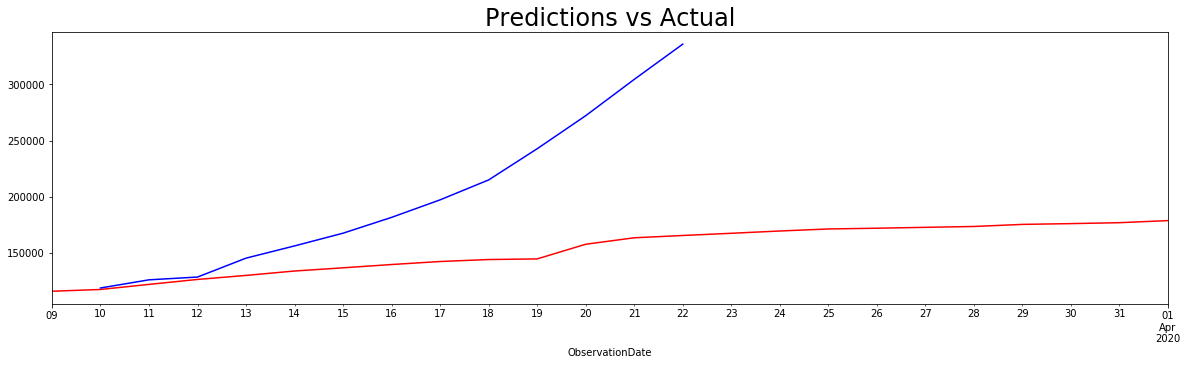

In [132]:
df_pred[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.Confirmed[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()

##### Final Model 

In [174]:
model_train=bydate.iloc[:int(bydate.shape[0]*0.85)]
valid=bydate.iloc[int(bydate.shape[0]*0.85):]

In [175]:
y_pred=valid.copy()

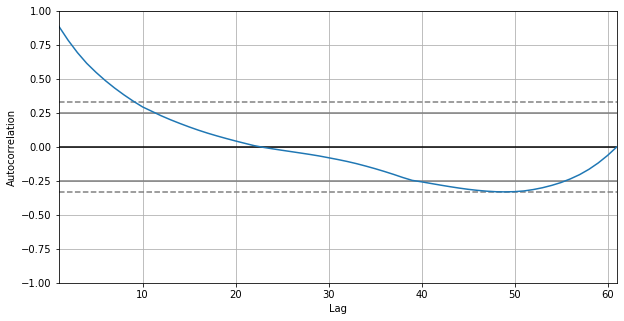

In [176]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10, 5))
autocorrelation_plot(bydate["Confirmed"])

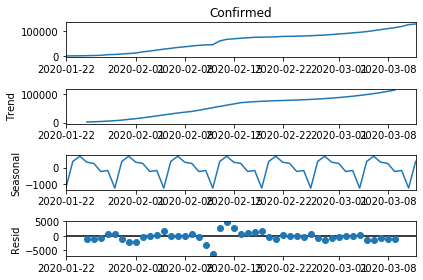

In [177]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(model_train["Confirmed"]).plot()
plt.show()

In [178]:
sts.adfuller(model_train.Confirmed)

(0.33383126057884954,
 0.9788445012066102,
 1,
 49,
 {'1%': -3.5714715250448363,
  '5%': -2.922629480573571,
  '10%': -2.5993358475635153},
 724.1158868602303)

In [179]:
log_series=np.log(model_train["Confirmed"])

In [180]:
sts.adfuller(log_series)

(-9.756172433048935,
 7.779066299036142e-17,
 0,
 50,
 {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616},
 -131.52923998976445)

In [181]:
model_arima=ARIMA(log_series,(1,1,3))
model_arima_fit=model_arima.fit()

In [182]:
prediction_arima=model_arima_fit.forecast(len(valid))[0]
y_pred["ARIMA Model Prediction"]=list(np.exp(prediction_arima))

(array([737446., 737456., 737463., 737470., 737477., 737485., 737492.,
        737499., 737506.]), <a list of 9 Text xticklabel objects>)

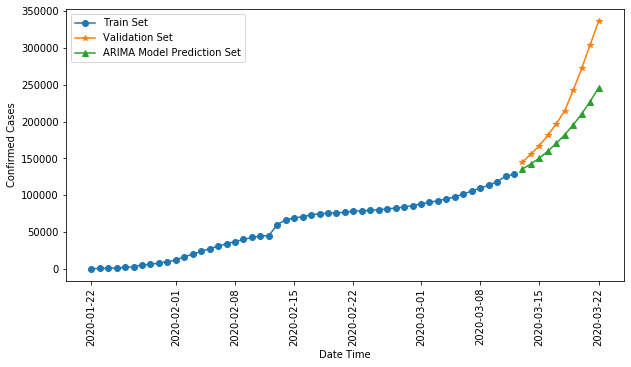

In [183]:
plt.figure(figsize=(10,5))
plt.plot(model_train.index,model_train["Confirmed"],label="Train Set",marker='o')
plt.plot(valid.index,valid["Confirmed"],label="Validation Set",marker='*')
plt.plot(y_pred["ARIMA Model Prediction"],label="ARIMA Model Prediction Set",marker='^')
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90)

In [197]:
new_date=[]
Confirmed_new_prediction=[]
for i in range(1,30):
    print(i)
    new_date.append(bydate.index[-1]+timedelta(days=i))
    Confirmed_new_prediction.append(np.exp((model_arima_fit.forecast(len(valid)+i)[0])[-1]))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [198]:
future_pred = pd.DataFrame(zip(list(new_date),list(Confirmed_new_prediction)),columns=["Date","ARIMA Model Prediction"]).head()



In [199]:
future_pred

,Date,ARIMA Model Prediction
0,2020-03-23,267127.549435
1,2020-03-24,290720.589634
2,2020-03-25,317161.216349
3,2020-03-26,346797.580184
4,2020-03-27,380024.159553


##### Residuals of Arima(1,1,1)

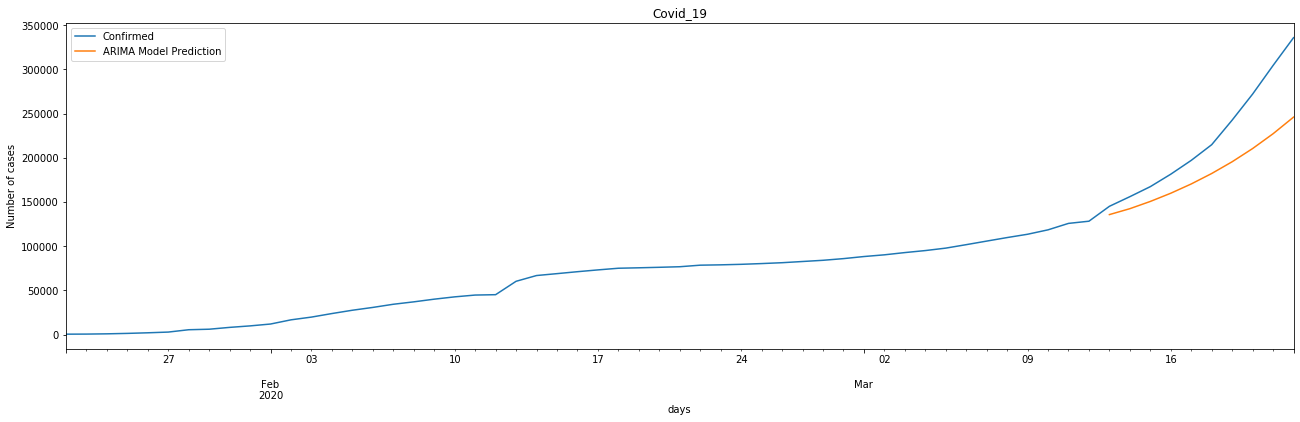

In [201]:
# Plot predictions against known values
title = 'Covid_19'
ylabel='Number of cases'
xlabel='days'

ax = bydate['Confirmed'].plot(legend=True,figsize=(22,6),title=title)
y_pred["ARIMA Model Prediction"].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
model_arima1_1_1 = ARIMA(bydate.Confirmed, order=(1,1,1))
results_arima1_1_1 = model_arima1_1_1.fit()
results_arima1_1_1.summary()

#### Final Model